In [1]:
!pip install transformers
import torch

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 14.9MB/s 
     |████████████████████████████████| 890kB 17.5MB/s 
     |████████████████████████████████| 1.1MB 41.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=e9d2696301b65a0a6540850248546a9f850ae01c6e6ee045b5e653276c251636
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


##Loading the Tokenizers

In [2]:
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModelWithLMHead
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
stack_tokenizer = AutoTokenizer.from_pretrained("jeniya/BERTOverflow_stackoverflow_github")
stack_model = AutoModelWithLMHead.from_pretrained("jeniya/BERTOverflow_stackoverflow_github")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:798: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Some weights of BertForMaskedLM were not initialized from the model checkpoint at jeniya/BERTOverflow_stackoverflow_github and are newly initialized: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Tokenizer on a sentence

In [3]:
sentence= "The reference assemblies for framework “.NETFramework,Version=v4.6.2” were not found"
bert_tokens = bert_tokenizer.tokenize(sentence)
stack_bert_tokens = stack_tokenizer.tokenize(sentence)
while len(stack_bert_tokens)<len(bert_tokens):
    stack_bert_tokens.append("")
print('{:<12} {:<12}'.format("BERT", "OverflowBERT"))
for tup in zip(bert_tokens, stack_bert_tokens):
    print('{:<12} {:<12}'.format(tup[0], tup[1]))

BERT         OverflowBERT
the          The         
reference    reference   
assemblies   assemblies  
for          for         
framework    framework   
“            “           
.            .           
net          NETFramework
##frame      ,           
##work       Version     
,            =           
version      v4          
=            .           
v            6           
##4          .           
.            2           
6            ”           
.            were        
2            not         
”            found       
were                     
not                      
found                    


##Tokenizer on a word

In [4]:
words = ['Scikit-Optimization', 
         'Docker-Image',
         'root@localhost',
         'XMLHttpRequest'
         ]
for word in words:
    print('\n','Word:',word, '\n')
    bert = []
    stackbert = []
    bert.extend(bert_tokenizer.tokenize(word))
    stackbert.extend(stack_tokenizer.tokenize(word))
    print('BERT')
    print(bert)
    print('BERTOverflow')
    print(stackbert)


 Word: Scikit-Optimization 

BERT
['sci', '##kit', '-', 'optimization']
BERTOverflow
['Scikit', '-', 'Optimization']

 Word: Docker-Image 

BERT
['dock', '##er', '-', 'image']
BERTOverflow
['Docker', '-', 'Image']

 Word: root@localhost 

BERT
['root', '@', 'local', '##hos', '##t']
BERTOverflow
['root', '@', 'localhost']

 Word: XMLHttpRequest 

BERT
['xml', '##ht', '##tp', '##re', '##quest']
BERTOverflow
['XMLHttpRequest']


In [5]:
with open("stack.txt", 'w') as f:  
    for token in stack_tokenizer.vocab.keys():
        f.write(token + '\n')

In [6]:
with open("bert.txt", 'w') as f:
        for token in bert_tokenizer.vocab.keys():
        f.write(token + '\n')

In [7]:
char_bert,char_stackbert= [],[]     # single character tokens
char_hashes_bert,char_hashes_stackbert= [],[]   # single character tokens preceeded by '##'
for token in bert_tokenizer.vocab.keys(): 
    if len(token) == 1:
        char_bert.append(token)    
    elif len(token) == 3 and token[0:2] == '##':
        char_hashes_bert.append(token)
for token in stack_tokenizer.vocab.keys():
    if len(token) == 1:
        char_stackbert.append(token)
    elif len(token) == 3 and token[0:2] == '##':
        char_hashes_stackbert.append(token)
print('BERT vocabulary contains',len(char_bert),'single character tokens','\n')
print('BERTOverflow vocabulary contains',len(char_stackbert),'single character tokens','\n')
print('BERT vocabulary contains',len(char_hashes_bert),'single character tokens preceeded by ##','\n')
print('BERTOverflow vocabulary contains',len(char_hashes_stackbert),'single character tokens preceeded by ##','\n')

BERT vocabulary contains 997 single character tokens 

BERTOverflow vocabulary contains 1000 single character tokens 

BERT vocabulary contains 997 single character tokens preceeded by ## 

BERTOverflow vocabulary contains 776 single character tokens preceeded by ## 



## Printing single character tokens and tokens preceeding by '##'

In [52]:
print('Number of single character tokens:', len(char_bert), '\n')
for i in range(0, len(char_bert), 40):
    end = min(i + 40, len(char_bert) + 1)
    print(' '.join(char_bert[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ

In [53]:
print('Number of single character tokens:', len(char_stackbert), '\n')
for i in range(0, len(char_stackbert), 40):
    end = min(i + 40, len(char_stackbert) + 1)
    print(' '.join(char_stackbert[i:end]))

Number of single character tokens: 1000 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H
I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p
q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ¯ ° ± ² ³ ´ µ ¶ · ¸ ¹ º »
¼ ½ ¾ ¿ Æ Ð × Ø Þ ß æ ð ÷ ø þ Đ đ ı Ł ł ŋ Œ œ ŧ ƒ ƛ Ɵ ǝ ɐ ɔ ə ɛ ɢ ɥ ɪ ɴ ɹ ʀ ʇ ʜ
ʟ ʰ ʳ ʺ ˆ ˇ ˈ ˋ ˘ ˙ ˚ ˛ ˜ ˝ ˢ Α Γ Δ Ε Ζ Η Θ Ι Κ Λ Μ Ξ Ο Π Ρ Σ Τ Υ Φ Ψ Ω α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϕ ϴ ϵ Ђ Ѕ І Ј Ћ А Б В Г Д Е Ж З И К Л
М Н О П Р С Т У Ф Х Ц Ч Ш Ы Э Ю Я а б в г д е ж з и к л м н о п р с т у ф х ц ч
ш щ ъ ы ь э ю я ђ є ѕ і ј ћ ҉ Ґ ә Ө א ב ג ד ה ו ז ח ט י כ ל ם מ ן נ ס ע פ צ ק ר
ש ת ׳ ، ؟ ء ا ب ة ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٠ ١ ٢
٣ ٤ ٥ ٦ ٨ ٩ پ چ ک گ ں ھ ہ ی ے ە ۰ ۱ ۲ ۳ ۴ ۵ अ आ क ख ग च ज ट ड त द ध न प ब भ म य
र ल व श ष स ह ा ि ी ो । १ ক ত ন ব ম য র ল া ি ে ਍ ર ા அ க ச ட த ன ப ம ய ர ல வ ா
ி ு ெ ே ை ం త న ర ల ు ಠ ം അ ക ങ ച ട ണ ത ദ ന പ ബ മ യ ര റ ല ള വ ഷ സ ാ ി ീ െ േ ก 

In [54]:
print('Number of single character tokens with hashes:', len(char_hashes_bert), '\n')
tokens = [token.replace('##', '') for token in char_hashes_bert]
for i in range(0, len(tokens), 40):
    end = min(i + 40, len(tokens) + 1)
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 997 

s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
² ₃ ı ₁ ⁺ ½ о ه ي α е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в
ا × ¹ ы ה ɛ л ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡
¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼ ¾ ¿ æ ð ÷ þ đ ħ ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ˡ ˢ ˣ ˤ β γ δ ε ζ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס
ע ף פ ץ צ ק ר ש ת ، ء ب ت ث ج ح خ ذ ز س ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ
ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ན པ བ མ འ ར ལ ས မ ა ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ

In [55]:
print('Number of single character tokens with hashes:', len(char_hashes_stackbert), '\n')
tokens = [token.replace('##', '') for token in char_hashes_stackbert]
for i in range(0, len(tokens), 40):
    end = min(i + 40, len(tokens) + 1)
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 776 

e t S u b l a y r T n s f o m i 3 0 L A j c U I g 4 1 2 B E x H d 9 6 5 D h C v
z P F p k N w O 7 8 V K M R ¼ Œ W J Q X Z Y G q € ا س イ ƒ ˆ ´ ன ு வ ை д о р ¤ ™
× С ര Ð ° ¦ ش ع ب ه ⌘ н ф м ह त م ح ف ظ ة ¾ ³ ย น ₁ Ł ˘ ═ ╤ ╗ £ → θ © ↓ ि र ¨ Ø
æ е т а и ל פ י ם ˜ द स ß у с к ˚ ☻ ± ı ª ¸ б в ь я ½ г з ¢ ц ² ᅥ ᆨ ᄇ ᅡ ᆼ л ø Æ
⁰ ك و ن د ج ز ე რ ა ¬ ÷ ر ک ي ⁿ て い る か ﬂ − п х ง ш タ フ µ ☐ ¥ œ א ˇ º ® た ま ร ก
─ │ あ ת Ω ˝ ╧ ¹ Þ ð þ च न ᅪ म ल ˛ ل ض ч ┼ ╢ ت も に ᅢ ╦ ถ ♠ ₂ υ ᄌ ᅵ ᄋ ᅲ ᆫ ו נ ℤ ᄉ
ᆯ ← ⁷ ذ ा ᄎ ι π ο τ α ध व ट า เ ล ی ᄊ ᆿ ﬁ െ യ പ ന ю ᅩ ᅬ ᆸ ᄂ ᄃ ε ▒ ├ ┤ ␊ λ ☺ پ Đ
ാ ച ി മ ం भ ¯ ┐ ҉ ર Ђ Д ᄏ ᄐ ర న ق ी ા ᄒ ы ਍ ᅮ ط Ј ー ク ╬ ╣ ട μ Ο ⁸ ス リ ω σ ハ η ہ
￼ ₄ ⁱ ŋ И ണ ക κ ┘ ρ χ ν ↵ ല ബ ♥ ھ ≡ ◀ ᅦ خ ณ ١ і Р ѕ ∈ ł ი ₃ ר ש У К ς ₀ ト ি ল া
コ ს ม ไ ป บ ค อ ว ≤ ు đ ט し す ⋅ ∩ └ ■ ☆ ᅧ ᅴ ᅯ ᇂ ত ो ष ה צ ╩ ╝ ص ᄍ ん ひ ⁻ ᄑ さ ק ס
מ ᆷ ᄅ ᅳ ➡ ▶ ║ ᄀ ▇ ⊂ ـ ╫ ג ज √ ъ ᄆ ᆮ ᅱ ᆺ ʺ ∃ ต ∞ ↑ ட ி க Г ⇧ य の േ ത ב ങ ം گ ɹ ల
ম ท Ґ Е ә ｅ れ ʇ こ ヘ シ ∫ ∂ ˙ ∆ ദ ള ⚠ ᅰ ন う く っ ら ж ŧ ┴ ░ ד ן റ ग ʀ ʟ

## Visualizing token lengths in the vocabulary

Maximum token length in BERT vocabulary is 18


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


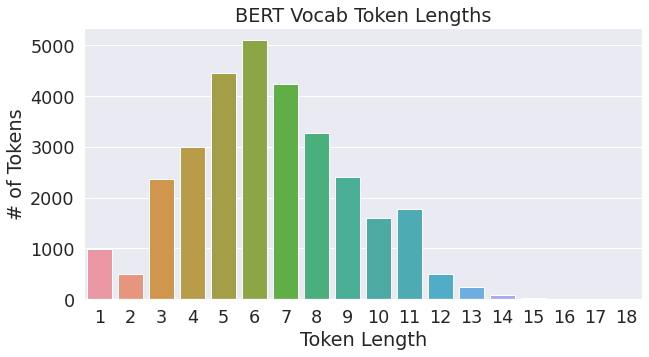

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')
sns.set(font_scale=1.6)
plt.rcParams["figure.figsize"] = (10,5)
token_lengths = [len(token) for token in bert_tokenizer.vocab.keys()]
sns.countplot(token_lengths)
plt.title('BERT Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')
print('Maximum token length in BERT vocabulary is', max(token_lengths))

In [16]:
for token in stack_tokenizer.vocab.keys():
  if len(token)==66:
    print(token)

##0000000000000000000000000000000000000000000000000000000000000000


Maximum token length in OverflowBERT vocabulary is 66


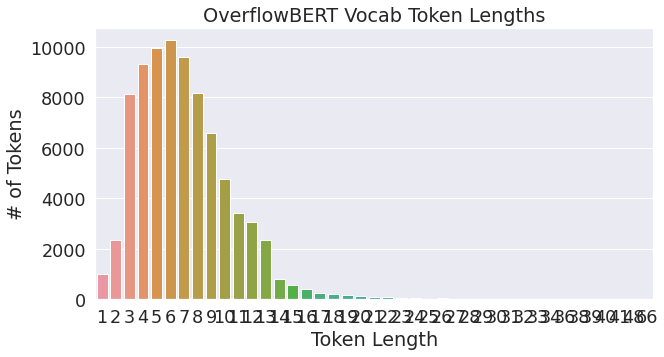

In [17]:
sns.set(style='darkgrid')
sns.set(font_scale=1.6)
plt.rcParams["figure.figsize"] = (10,5)
token_lengths = [len(token) for token in stack_tokenizer.vocab.keys()]
sns.countplot(token_lengths)
plt.title('OverflowBERT Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')
print('Maximum token length in OverflowBERT vocabulary is', max(token_lengths))

Number of subwords in BERT vocab: 5,828 


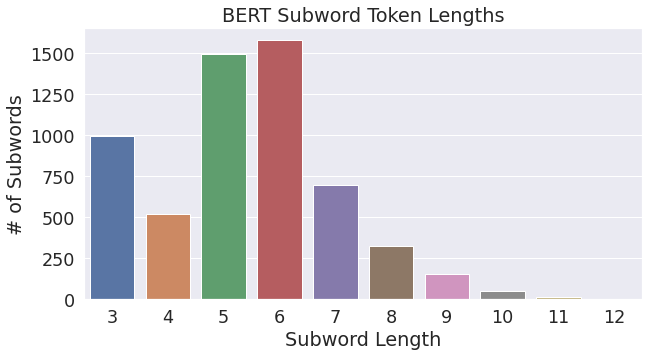

In [36]:
bert_subwords = 0
bert_subword_lengths = []
for token in bert_tokenizer.vocab.keys():
    if len(token) >= 2 and token[0:2] == '##':
        bert_subwords += 1
        length = len(token)   
        bert_subword_lengths.append(length)
vocab_size = len(bert_tokenizer.vocab.keys())
prcnt = float(bert_subwords) / vocab_size * 100.0
sns.countplot(bert_subword_lengths)
plt.title('BERT Subword Token Lengths')
plt.xlabel('Subword Length')
plt.ylabel('# of Subwords')
print('Number of subwords in BERT vocab: {:,} '.format(bert_subwords))

In [32]:
for token in bert_tokenizer.vocab.keys():
    if len(token)==12 and token[0:2] == '##':
      print(token)

##orestation
##ropriation
##filtration


Number of subwords in OverflowBERT: 19,984


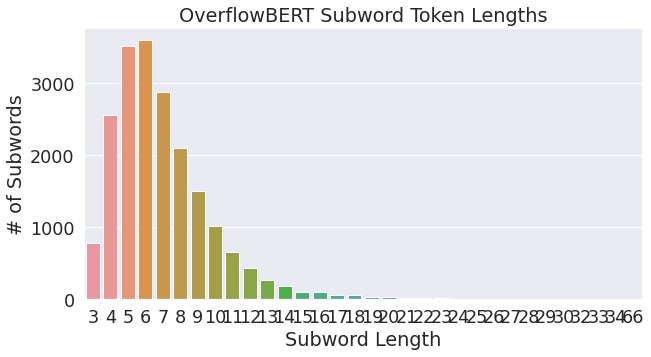

In [37]:
stack_subwords = 0
stack_subword_lengths = []
for token in stack_tokenizer.vocab.keys():
    if len(token) >= 2 and token[0:2] == '##':
        stack_subwords += 1
        length = len(token)    
        stack_subword_lengths.append(length)
vocab_size = len(stack_tokenizer.vocab.keys())
sns.countplot(stack_subword_lengths)
plt.title('OverflowBERT Subword Token Lengths')
plt.xlabel('Subword Length')
plt.ylabel('# of Subwords')
print('Number of subwords in OverflowBERT: {:,}'.format(stack_subwords))
